In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 学習データを読み込む
train = np.loadtxt('click.csv', delimiter=',', dtype='int', skiprows=1)
train_x = train[:, 0]
train_y = train[:, 1]

In [3]:
# 標準化 z-score平均化
mu = train_x.mean()
sigma = train_x.std()

In [4]:
def standardize(x):
    return (x - mu) / sigma

In [5]:
train_x = standardize(train_x)

In [6]:
# パラメータを初期化
theta0 = np.random.rand()
theta1 = np.random.rand()

In [7]:
# 予測関数
def f(x):
    return theta0 + theta1 * x

In [8]:
# 目的関数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

In [9]:
# 学習率 1e-3=1＊10^(-3)=0.001
ETA = 1e-3

In [10]:
# 誤差の差分
diff = 1

In [11]:
# 更新回数
count = 0

In [12]:
# 誤差の差分が0.01以下になるまでパラメータ更新を繰り返す
error = E(train_x, train_y)
while diff > 1e-2:
    # 更新結果を一時変数に保存
    tmp_theta0 = theta0 - ETA * np.sum((f(train_x) - train_y))
    tmp_theta1 = theta1 - ETA * np.sum((f(train_x) - train_y) * train_x)

    # パラメータを更新
    theta0 = tmp_theta0
    theta1 = tmp_theta1

    # 前回の誤差との差分を計算
    current_error = E(train_x, train_y)
    diff = error - current_error
    error = current_error

    # ログの出力
    count += 1
    log = '{}回目: theta0 = {:.3f}, theta1 = {:.3f}, 差分 = {:.4f}'
    print(log.format(count, theta0, theta1, diff))

1回目: theta0 = 8.721, theta1 = 2.439, 差分 = 76300.7500
2回目: theta0 = 17.130, theta1 = 4.260, 差分 = 73279.2403
3回目: theta0 = 25.370, theta1 = 6.045, 差分 = 70377.3824
4回目: theta0 = 33.446, theta1 = 7.793, 差分 = 67590.4381
5回目: theta0 = 41.360, theta1 = 9.507, 差分 = 64913.8567
6回目: theta0 = 49.116, theta1 = 11.186, 差分 = 62343.2680
7回目: theta0 = 56.716, theta1 = 12.832, 差分 = 59874.4746
8回目: theta0 = 64.165, theta1 = 14.445, 差分 = 57503.4454
9回目: theta0 = 71.465, theta1 = 16.026, 差分 = 55226.3089
10回目: theta0 = 78.618, theta1 = 17.575, 差分 = 53039.3471
11回目: theta0 = 85.629, theta1 = 19.093, 差分 = 50938.9890
12回目: theta0 = 92.499, theta1 = 20.581, 差分 = 48921.8050
13回目: theta0 = 99.232, theta1 = 22.039, 差分 = 46984.5015
14回目: theta0 = 105.831, theta1 = 23.467, 差分 = 45123.9153
15回目: theta0 = 112.297, theta1 = 24.868, 差分 = 43337.0082
16回目: theta0 = 118.634, theta1 = 26.240, 差分 = 41620.8627
17回目: theta0 = 124.845, theta1 = 27.585, 差分 = 39972.6765
18回目: theta0 = 130.931, theta1 = 28.903, 差分 = 38389.7585
19

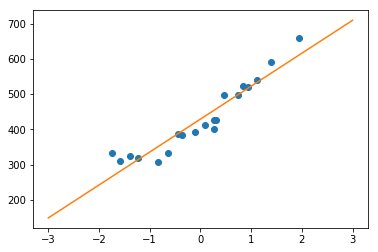

In [13]:
# プロットして確認
x = np.linspace(-3, 3, 100)
plt.plot(train_x, train_y, 'o')
plt.plot(x, f(x))
plt.show()